In [ ]:
# Завантаження потрібних бібліотек
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Імпорт відповідних бібліотек
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# === 1. Налаштування ===
# Параметри
HOME = os.getcwd() # Домашня директорія
API_KEY = "US6GFXKmmIauPoD8GLi5" # API-ключ
WORKSPACE_NAME = "dekkan-neural-network-workspace" # Назва робочої області (Dekkan neural network workspace)
PROJECT_NAME = "cats_detection-yjccj" # Ім'я проєкту (Cats_detection)
DATASET_VERSION = 1 # Версія датасету
DATA_FORMAT = "yolov11" # Формат даних датасету
MODEL_PATH = f"{HOME}/models/yolo11m.pt" # Шлях до завантаженої моделі
TRAIN_EPOCHS = 50 # Кількість епох
IMG_SIZE = 640 # Розмір зображень

In [ ]:
# === 2. Завантаження датасету ===
def download_dataset():
    print("Завантаження датасету...")
    rf = Roboflow(api_key=API_KEY)
    project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
    version = project.version(DATASET_VERSION)
    dataset = version.download(DATA_FORMAT)
    print(f"Датасет завантажено до: {dataset.location}")
    return dataset

In [ ]:
# === 3. Тренування моделі ===
def train_model(dataset):
    print("Тренування моделі...")
    model = YOLO(MODEL_PATH)  # Завантаження предтренованої моделі

    print("Пристрій, що використовується:", model.device)
    model.train(
        data = f"{dataset.location}/data.yaml",
        epochs = TRAIN_EPOCHS,
        imgsz = IMG_SIZE,
        plots = True,
        save = True,
        project = 'runs/detect',  # Стандартний шлях
        name = 'train_result',  # Ім'я підкаталогу
        batch = 32,
    )
    print("Тренування завершено.")
    return model

In [ ]:
# === 4. Основний блок ===
if __name__ == "__main__":
    # Завантаження датасету
    dataset = download_dataset()

    # Тренування моделі
    model = train_model(dataset)

    # Отримання шляху до останньої тренувальної сесії
    runs_path = "runs/detect"
    latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)
    print(f"Останній запуск збережено в: {latest_run}")

    print("Все завершено успішно.")

Завантаження датасету...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats_detection-1 in yolov11:: 100%|██████████| 33458/33458 [00:04<00:00, 6981.97it/s]


Датасет завантажено до: /content/Cats_detection-1
Тренування моделі...


100%|██████████| 38.8M/38.8M [00:00<00:00, 70.9MB/s]


Пристрій, що використовується: cpu
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/models/yolo11m.pt, data=/content/Cats_detection-1/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 60.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Cats_detection-1/train/labels... 14634 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14634/14634 [00:10<00:00, 1457.51it/s]


train: New cache created: /content/Cats_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cats_detection-1/valid/labels... 1393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1393/1393 [00:01<00:00, 1229.07it/s]

val: New cache created: /content/Cats_detection-1/valid/labels.cache


Plotting labels to runs/detect/train_result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_result
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      16.9G     0.6753      2.558      1.363         29        640: 100%|██████████| 458/458 [02:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.77it/s]

                   all       1393       1440      0.443      0.473      0.445      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      16.7G     0.6643      1.799      1.323         29        640: 100%|██████████| 458/458 [01:57<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.35it/s]

                   all       1393       1440      0.501      0.566      0.536      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.8G     0.7534      1.873      1.387         27        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.30it/s]

                   all       1393       1440       0.21      0.331      0.158     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      16.8G     0.8127      1.997      1.428         34        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.35it/s]

                   all       1393       1440      0.348      0.487      0.367      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      16.8G     0.7492      1.832      1.377         29        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.33it/s]

                   all       1393       1440      0.447      0.536      0.481      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      16.7G     0.7098      1.732      1.346         24        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]

                   all       1393       1440      0.481      0.573      0.565      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      16.8G     0.6768      1.641      1.315         27        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]

                   all       1393       1440      0.594      0.576      0.612       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      16.8G     0.6458      1.559      1.296         30        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.37it/s]

                   all       1393       1440      0.676      0.692      0.753      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      16.8G     0.6331       1.51      1.285         27        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.686      0.704      0.737      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      16.8G     0.6134      1.448      1.267         40        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.37it/s]

                   all       1393       1440      0.695      0.692      0.762      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      16.8G     0.5934      1.406      1.255         29        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.40it/s]

                   all       1393       1440      0.694      0.727      0.771      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.8G     0.5823      1.364      1.248         35        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]

                   all       1393       1440      0.718        0.7      0.774      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.8G     0.5707      1.332      1.238         26        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.36it/s]

                   all       1393       1440      0.786      0.746      0.842      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      16.8G     0.5612      1.292      1.226         31        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]

                   all       1393       1440      0.774      0.742      0.837      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      16.8G       0.55      1.276      1.222         32        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.40it/s]

                   all       1393       1440      0.787      0.797       0.86      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      16.8G      0.539      1.242      1.213         33        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]

                   all       1393       1440      0.762      0.784      0.848      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      16.8G     0.5384      1.226      1.213         33        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all       1393       1440      0.799      0.782      0.868      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      16.8G     0.5275      1.184      1.203         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all       1393       1440      0.777       0.82      0.873      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      16.8G     0.5214      1.159        1.2         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all       1393       1440      0.806      0.802      0.875      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      16.8G     0.5117      1.137       1.19         23        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.823      0.814      0.885      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      16.8G     0.5065       1.11      1.187         34        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.834        0.8      0.891      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      16.8G     0.4978      1.095      1.181         30        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all       1393       1440      0.852      0.831      0.902      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      16.8G     0.4973      1.074      1.182         31        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.843      0.855      0.911      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      16.8G     0.4916      1.047      1.176         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.844       0.83      0.903        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      16.8G     0.4828      1.022      1.171         31        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.847      0.852      0.914      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      16.8G     0.4811      1.015      1.167         33        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.885       0.83       0.92      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      16.8G     0.4718     0.9937      1.163         33        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.885      0.835      0.921      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      16.8G      0.464     0.9692      1.156         29        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.889      0.853      0.919      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      16.8G     0.4644     0.9553      1.154         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.884      0.858      0.929      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.8G     0.4615     0.9392      1.155         34        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440       0.86      0.895      0.933      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      16.8G     0.4547     0.9313      1.151         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.894      0.869      0.935      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      16.8G     0.4481     0.9083      1.146         26        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440       0.88      0.871      0.936       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      16.8G     0.4447     0.8958      1.142         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.40it/s]

                   all       1393       1440      0.898      0.865      0.937      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      16.8G      0.439     0.8765      1.136         30        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]

                   all       1393       1440      0.902      0.876      0.941      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      16.8G     0.4291     0.8605      1.132         36        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]

                   all       1393       1440      0.886      0.883      0.942      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      16.8G     0.4306      0.845      1.131         29        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]

                   all       1393       1440      0.894      0.875      0.941      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      16.8G     0.4275     0.8358       1.13         22        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]

                   all       1393       1440       0.91      0.864      0.933      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      16.8G     0.4198     0.8152      1.125         26        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]

                   all       1393       1440      0.909      0.867       0.94      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      16.8G     0.4134     0.8056      1.122         28        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]

                   all       1393       1440      0.895      0.867      0.937      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      16.8G      0.413     0.7836      1.119         34        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.42it/s]

                   all       1393       1440      0.896       0.87      0.936      0.865


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      16.7G     0.2916     0.3241      1.101         10        640: 100%|██████████| 458/458 [01:55<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]

                   all       1393       1440      0.905      0.861      0.933      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      16.8G     0.2794     0.3006      1.085         11        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.40it/s]

                   all       1393       1440      0.888      0.872      0.938      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      16.8G     0.2694     0.2765      1.077         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all       1393       1440      0.889       0.88      0.936      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      16.8G     0.2633     0.2571      1.066         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.883      0.888      0.934      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      16.7G     0.2539     0.2384      1.056         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.876      0.894      0.936      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      16.8G     0.2476     0.2286      1.051         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]

                   all       1393       1440      0.884      0.883      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      16.8G     0.2386      0.214      1.038         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]

                   all       1393       1440      0.916      0.863      0.937      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      16.8G     0.2296     0.1972      1.033         11        640: 100%|██████████| 458/458 [01:53<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.41it/s]

                   all       1393       1440        0.9      0.876      0.939      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      16.8G     0.2241     0.1872      1.027         10        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]

                   all       1393       1440      0.905      0.872      0.936      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      16.8G     0.2184     0.1744      1.024         11        640: 100%|██████████| 458/458 [01:53<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]

                   all       1393       1440      0.898      0.879      0.936      0.884



50 epochs completed in 1.689 hours.
Optimizer stripped from runs/detect/train_result/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train_result/weights/best.pt, 40.5MB

Validating runs/detect/train_result/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.94it/s]


                   all       1393       1440      0.901      0.875      0.939      0.885
            Abyssinian         55         55      0.863      0.945      0.968      0.915
      American Bobtail         64         65      0.796      0.782      0.831      0.807
         American Curl         44         47      0.902      0.915       0.96      0.929
                Bengal         69         70      0.785      0.836      0.875      0.789
                Birman         70         70      0.804      0.823      0.857      0.797
                Bombay         66         66      0.951       0.97      0.977      0.927
     British Shorthair         54         54      0.937      0.831      0.901      0.857
           Cornish Rex         60         61      0.888      0.934      0.961      0.923
          Egyptian Mau         51         51      0.831      0.784      0.917      0.859
            Khao Manee         42         49       0.92      0.941      0.986       0.92
                 Lyko

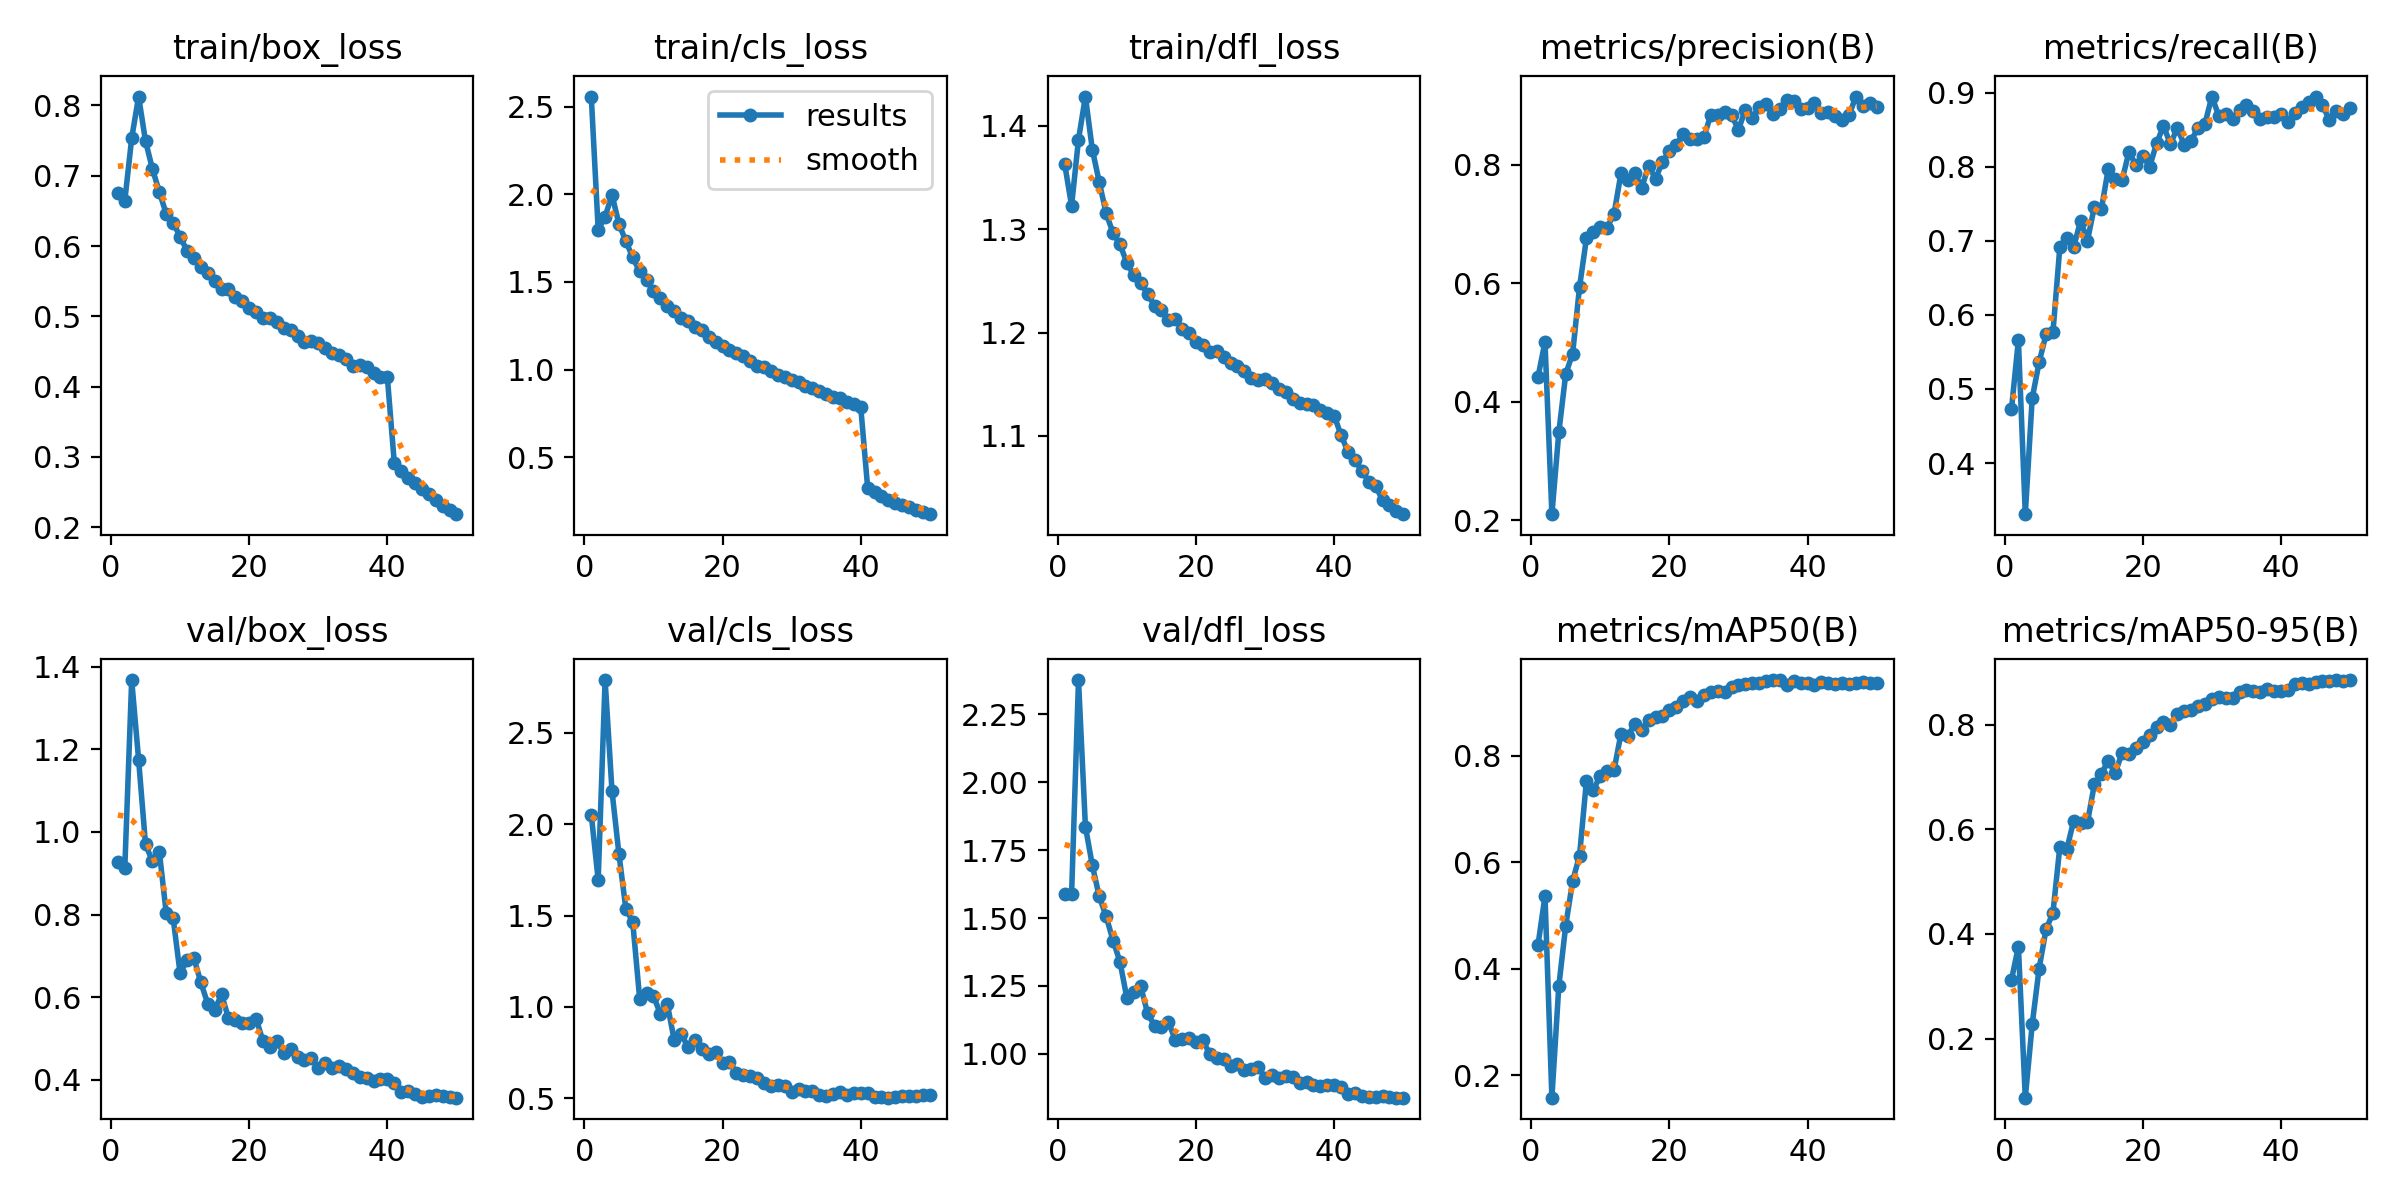

In [ ]:
# === 5. Отримання результатів навчання у вигляді графіків ===

# Загальні результати навчання
IPyImage (filename = f'/content/runs/detect/train_result/results.png', width =600)

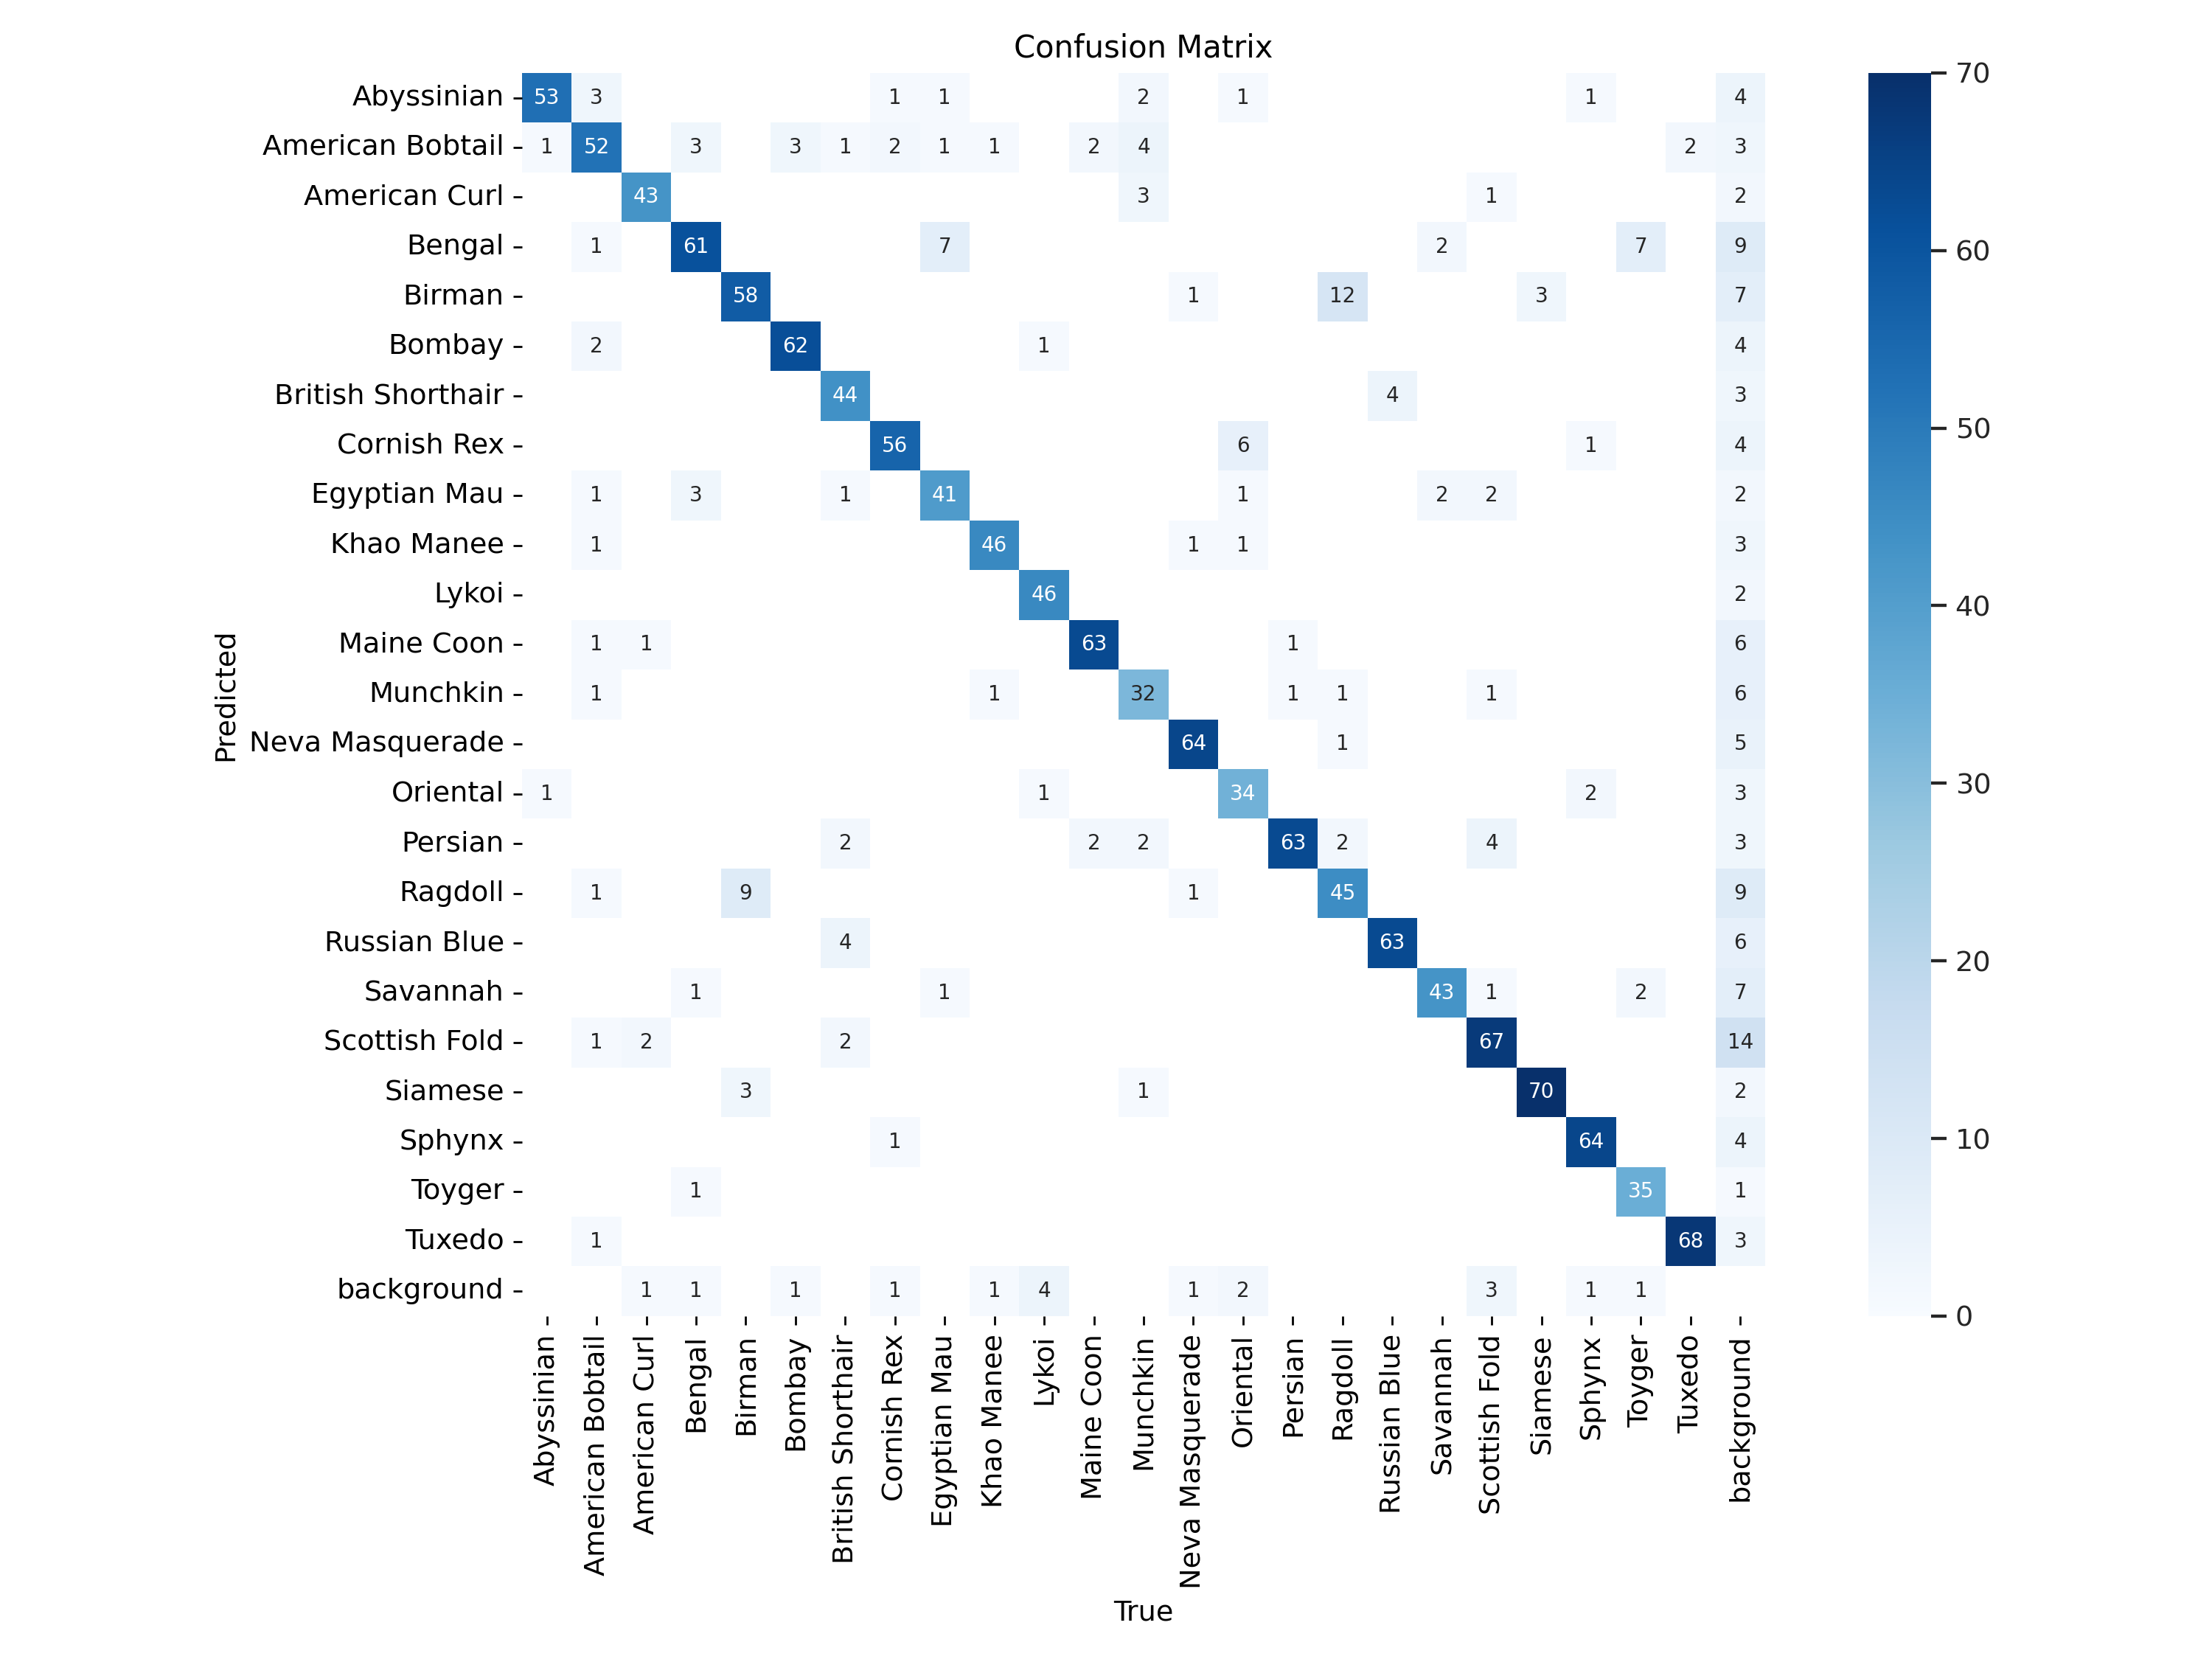

In [ ]:
# Матриця заплутаності (Confusion Matrix)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix.png', width =600)

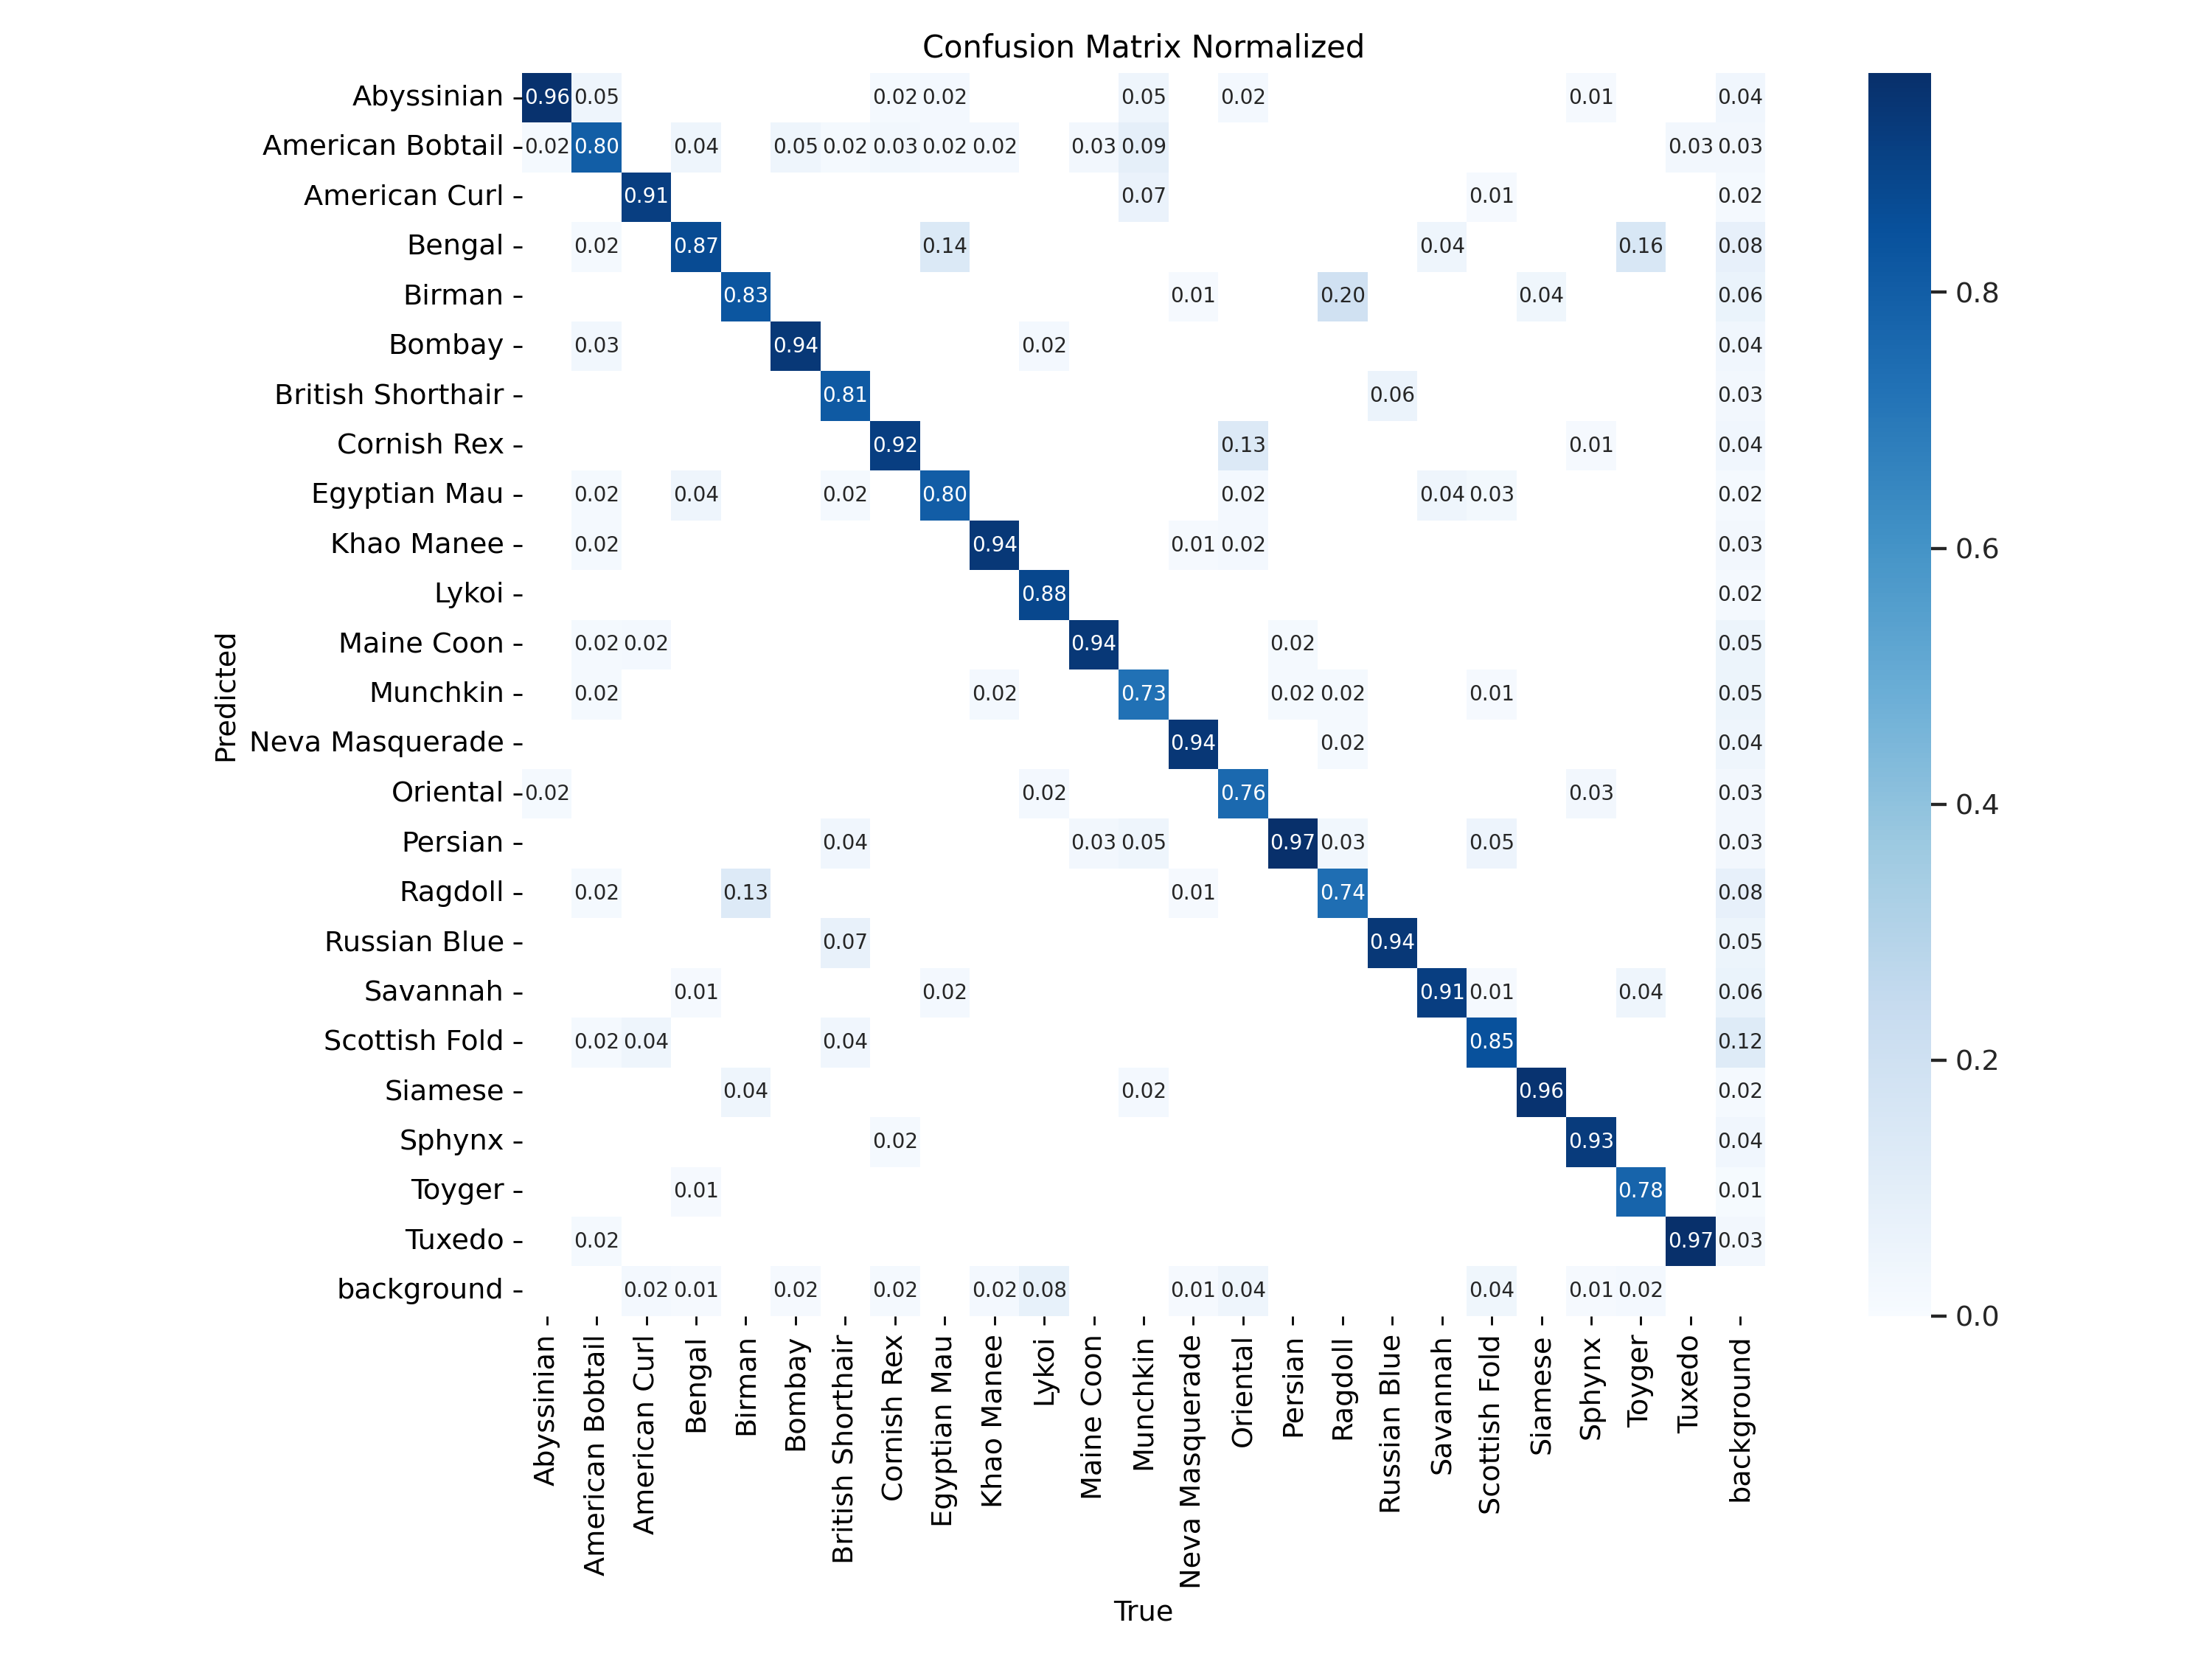

In [ ]:
# Нормалізована матриця заплутаності (Confusion Matrix Normalized)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix_normalized.png', width =600)

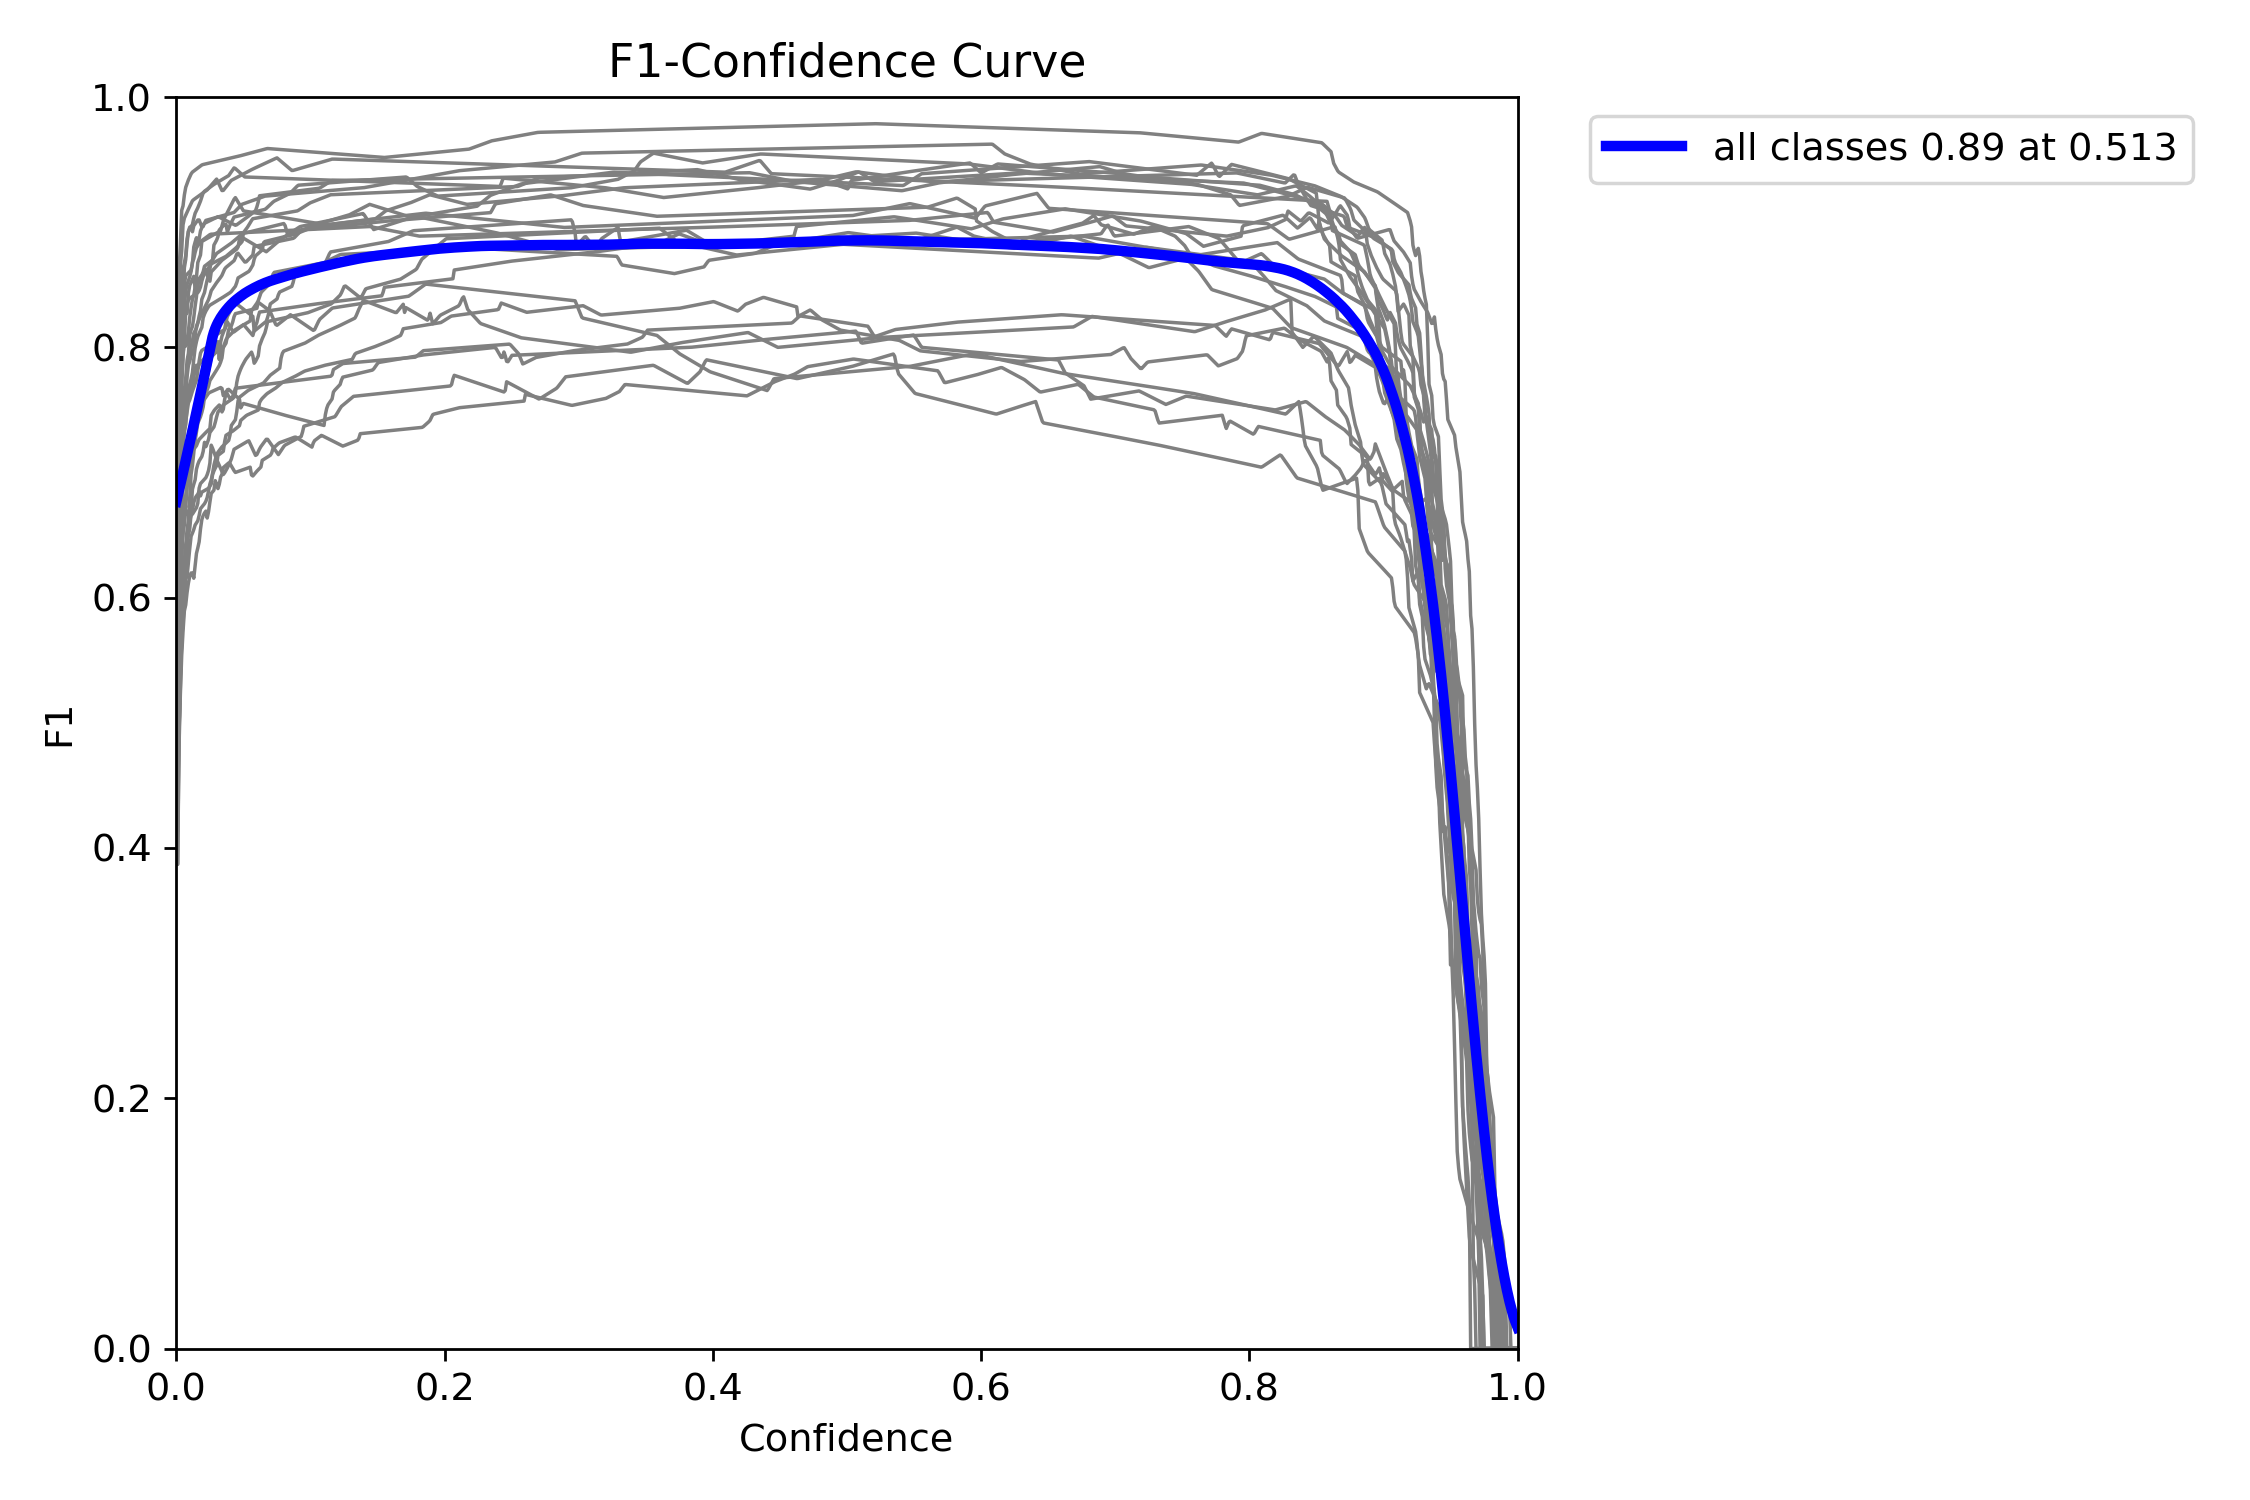

In [ ]:
# Графік залежності F1-score від рівня впевненості (F1-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/F1_curve.png', width =600)

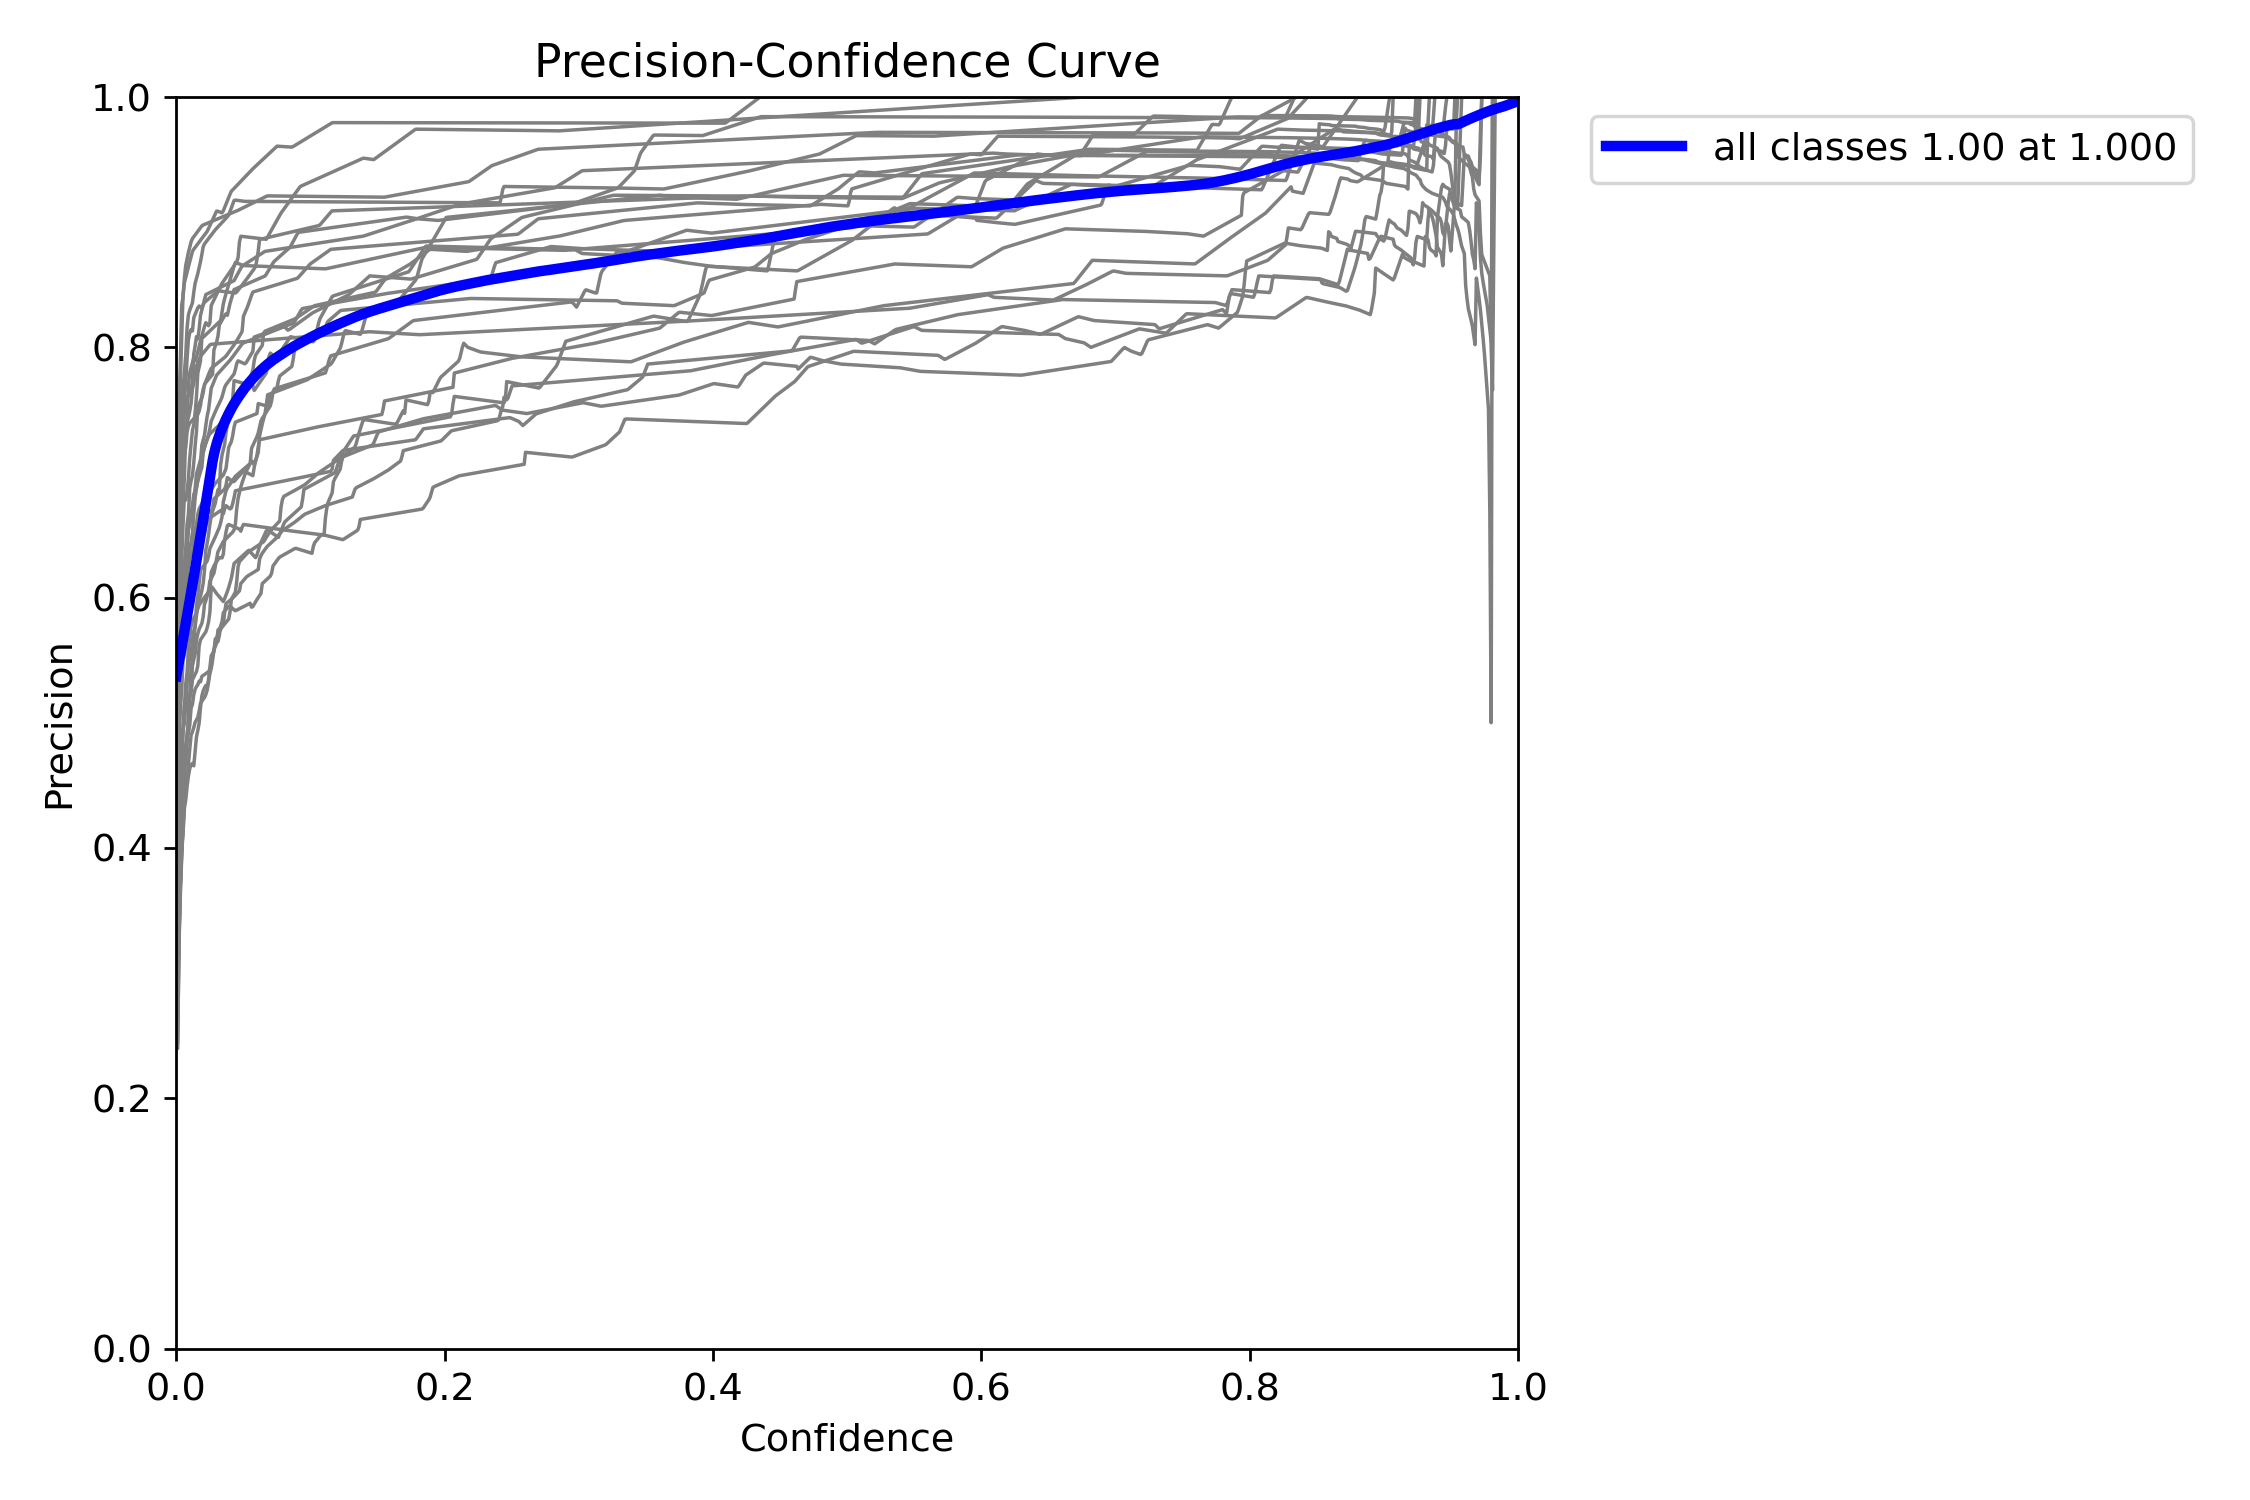

In [ ]:
# Графік залежності точності від впевненості *(Orecision-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/P_curve.png', width =600)

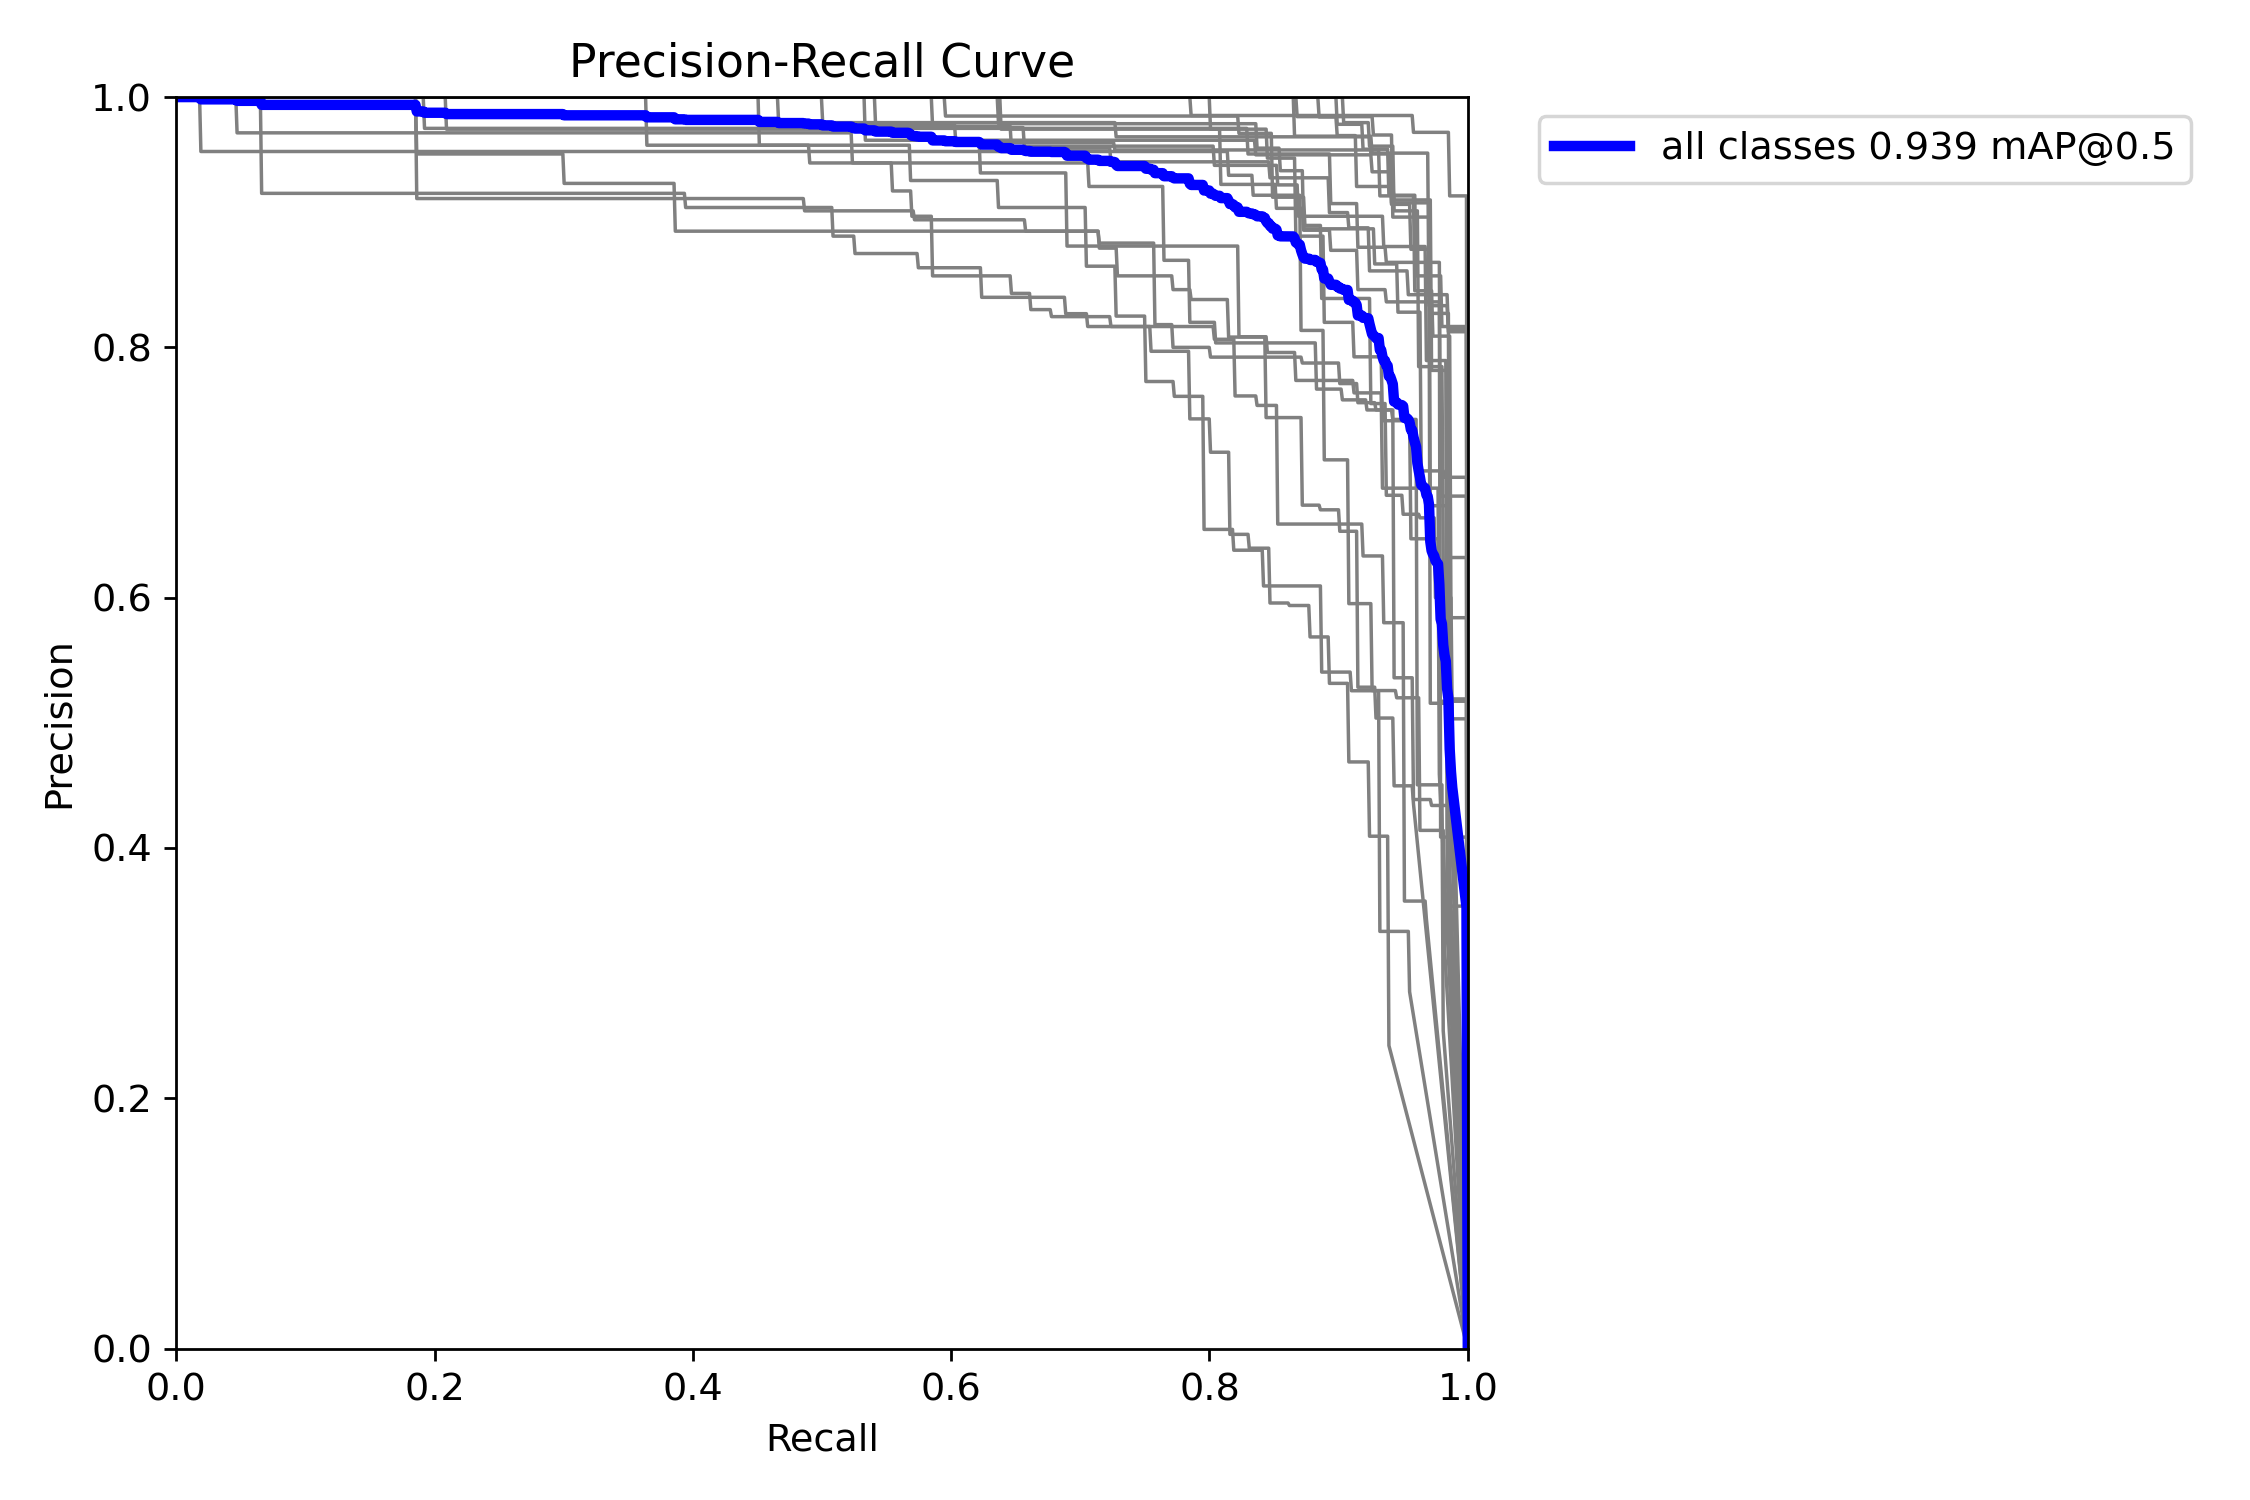

In [ ]:
# Графік залежності точності від повноти (Precision-Recall Curve)
IPyImage (filename = f'/content/runs/detect/train_result/PR_curve.png', width =600)

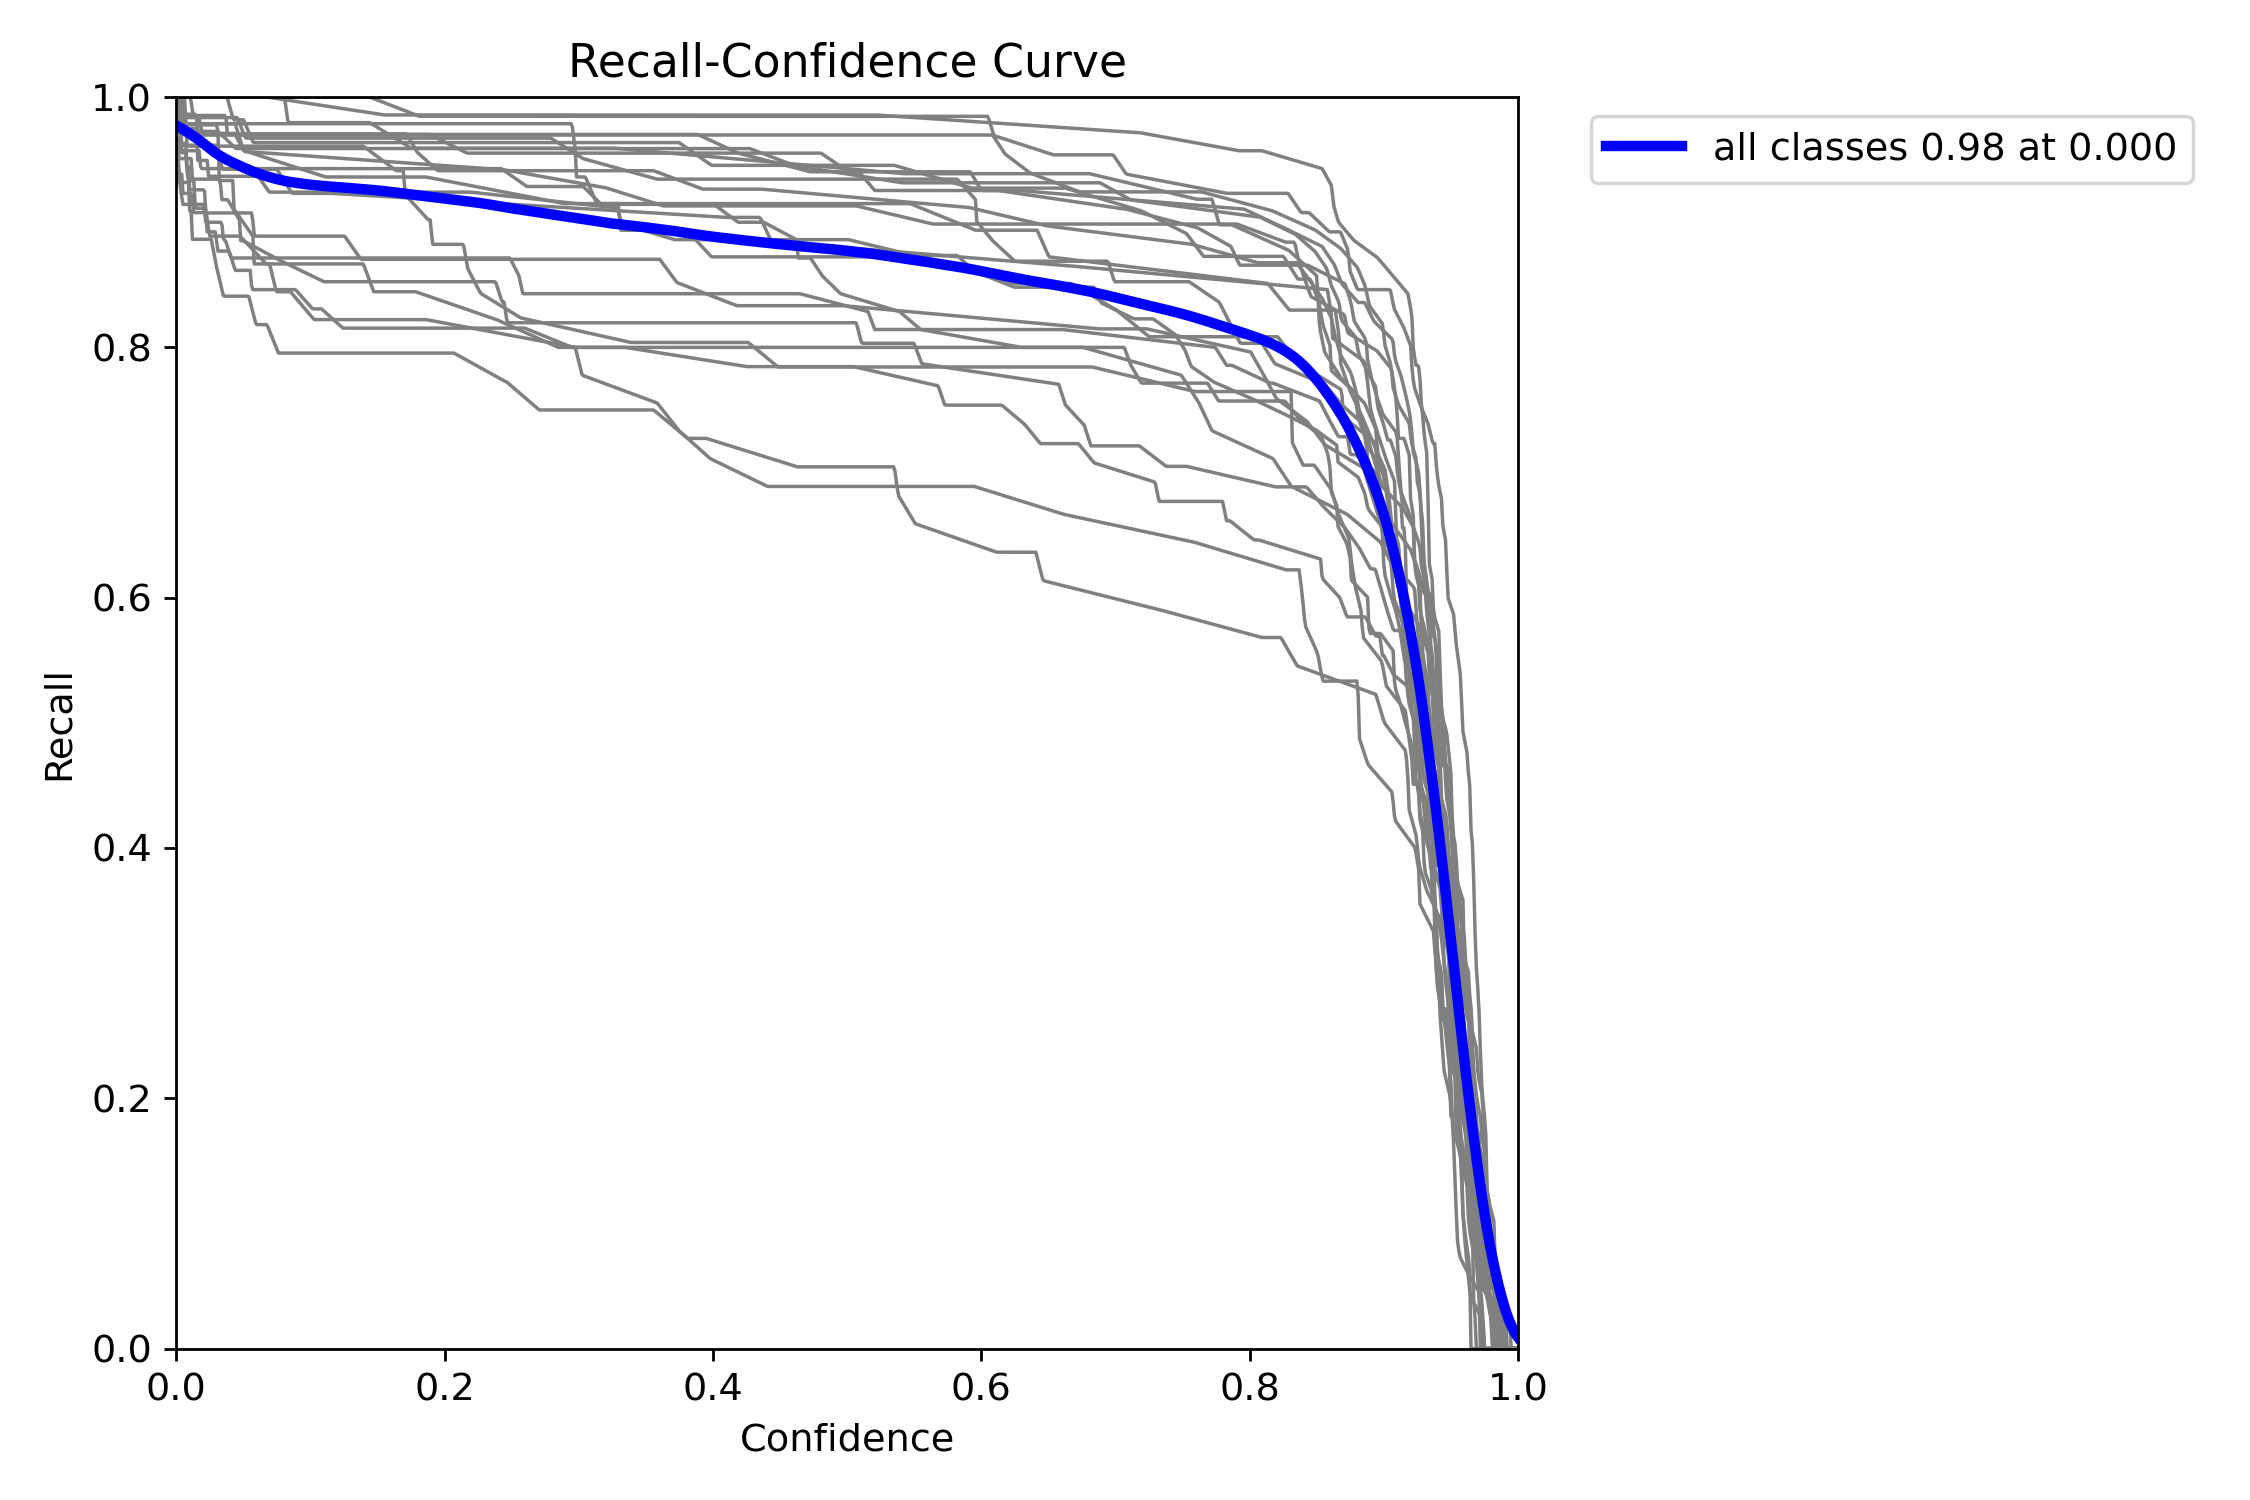

In [ ]:
# Графік залежності повноти від впевненості (Recall-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/R_curve.png', width =600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Вкажи шлях до вихідної папки
source_folder = "/content/runs"

# Вкажи шлях до папки на Google Drive
destination_folder = "/content/drive/MyDrive/ITVR_Coursework/yolo11m (50 epochs, 32 im batch)"

# Копіюємо папку, дозволяючи перезаписувати існуючі файли
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Папку успішно скопійовано!")

Папку успішно скопійовано!


In [ ]:
import shutil
from google.colab import files

# Вкажи шлях до папки, яку потрібно завантажити
folder_path = "/content/runs"

# Стиснемо папку у формат ZIP
shutil.make_archive("yolo11m (50 epochs, 32 im batch)", "zip", folder_path)

# Завантажимо архів
files.download("yolo11m (50 epochs, 32 im batch).zip")